In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


plt.rcParams["font.family"] = "Serif"
plt.rcParams.update({'font.size': 10, 'font.weight' : 100})

In [2]:
#for i in range(0, len(fehscs)):
#    np.save("Data/fehs" + str(i), fehscs[i])
#    np.save("Data/mgfes" + str(i), mgfes[i])
#    np.save("Data/masses" + str(i), masses[i])
#    np.save("Data/Rs" + str(i), Rs[i])

In [3]:
fehlist = []
mgfelist = []
masslist = []
rlist = []

for i in range(0, 8):
    fehlist.append(np.load("Data/fehs" + str(i) + ".npy"))
    mgfelist.append(np.load("Data/mgfes" + str(i) + ".npy"))
    masslist.append(np.load("Data/masses" + str(i) + ".npy"))
    rlist.append(np.load("Data/Rs" + str(i) + ".npy"))

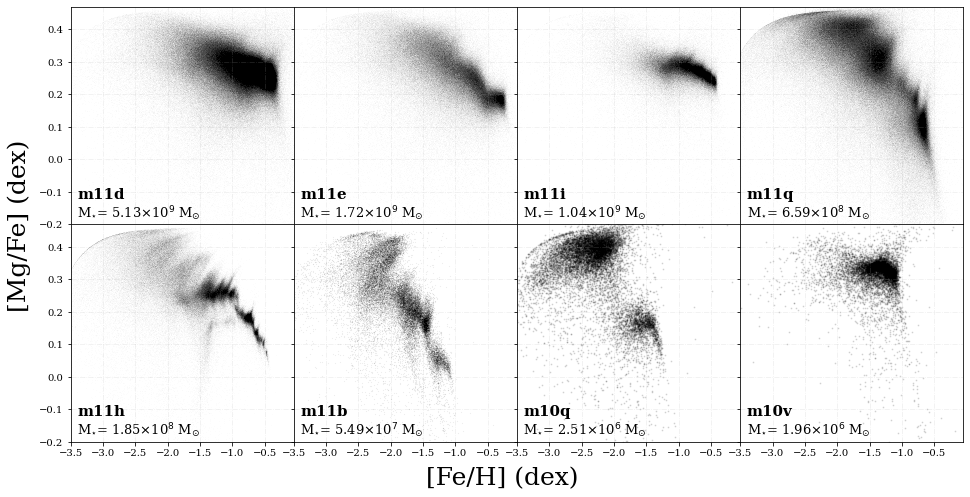

In [4]:
fehscs = fehlist
mgfes = mgfelist
masses = masslist
Rs = rlist
names = ['m11d', 'm11e', 'm11i', 'm11q', 'm11h', 'm11b', 'm10q', 'm10v'] # ordered by stellar mass

# Creates a figure with 9 subplots.
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(nrows=2, ncols=4, sharey=True, sharex = True,
                           figsize=(16,8))

axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8] #initializing the subplots
plots = [] #this will be used for the embedded colorbars if creating hist2d

for i in range(0,8):
    #Setting up the hist 2ds
    ind = np.where(Rs[i] < 20)
    plots.append(axes[i].hist2d(fehscs[i][ind],mgfes[i][ind], bins = 150, cmap = 'Greys', range = [[-3.5,0], [-0.1,0.5]])) 
    
    # we clear this plot because really, we just need the hist2d data for certain features down the road.
    # e.g. modifying xtick/ytick axes labels requires access to plot indices, most easily done with hist2d.
    
    axes[i].clear()
    
    axes[i].set_ylim(-0.2,0.47)
    axes[i].set_xlim(-3.5,-0.05) #set to -3.9, -0.1 in order to make xticks easier to edit. Otherwise too many.

    #actual plotting begins
    axes[i].scatter(fehscs[i][ind], mgfes[i][ind], alpha = 0.02, s = 0.05, color = 'black')
    if(i == 5):
        axes[i].scatter(fehscs[i][ind], mgfes[i][ind], alpha = 0.1, s = 0.05, color = 'black')
   
    
    ## Because m10s have way fewer stars, they don't show up for the same setting in a scatter plot.
    if((i == 6) or (i == 7)):
        axes[i].scatter(fehscs[i][ind], mgfes[i][ind], alpha = 0.1, s = 1, color = 'black') 
    
    #manually set the place in which to put the names of each galaxy
    axes[i].text(-3.4,-.12,names[i], size = 15, weight = 'bold')
    if(i < 3):
        axes[i].text(-3.4,-.18, 
                 r'M$_{\star}$= ' + str(round(np.sum(masses[i])/1e9, 2)) + r"$\times$10$^9$ M$_{\odot}$", size = 13)
    if((i > 2) & (i < 5)):
        axes[i].text(-3.4,-.18, 
                 r'M$_{\star}$= ' + str(round(np.sum(masses[i])/1e8, 2)) + r"$\times$10$^8$ M$_{\odot}$", size = 13)
    if((i == 5)):
        axes[i].text(-3.4,-.18, 
                 r'M$_{\star}$= ' + str(round(np.sum(masses[i])/1e7, 2)) + r"$\times$10$^7$ M$_{\odot}$", size = 13)
    if((i > 5) & (i < 8)):
        axes[i].text(-3.4,-.18, 
                 r'M$_{\star}$= ' + str(round(np.sum(masses[i])/1e6, 2)) + r"$\times$10$^6$ M$_{\odot}$", size = 13)
    #axes[i].text(-3.85, 0.12, "n = " + str(len(fehscs[i])), size = 12)
    
    #gridlines to make seeing easier
    axes[i].grid(linestyle = '-.', alpha = 0.2)
    if(i >= 5): # Adjusts the bottom axis to not have overlapping ticks
        xticks = axes[i].xaxis.get_majorticklabels()
        #plt.setp(xticks[0], visible=False)
        #plt.setp(xticks[8], visible = False)

# manually setting axis labels for whole plot
fig.text(0.07,0.5,"[Mg/Fe] (dex)", va = 'center', size = 25, rotation = 90)
fig.text(0.5, 0.05,"[Fe/H] (dex)", ha = 'center', size = 25)

# getting rid of whitespace
plt.subplots_adjust(wspace=0, hspace=0)
#plt.savefig('8gals_whole_scatter_final_stmass_rr.png', dpi = 150, bbox_inches='tight')
plt.show()